In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [3]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [10]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # ***************************************************************************************************
    # INSERT YOUR CODE HERE
    # TODO: initialize cluster centers.
    # TODO: Make sure you choose k clusters from the data itself,
    #       or ensure otherwise that your initializations have the same scaling as the data
    #initialisation mean
    mu=np.random.rand(k,data.shape[1])*np.amax(data)
    # pick k random vect dans data est le mieux
    take=np.random.shuffle(data)
    #mu=data[0:k,:]
    
    return (mu)
    # ***************************************************************************************************


### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [11]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: build distance matrix
    dist=np.zeros((data.shape[0],mu.shape[0]))
    z=np.zeros((data.shape[0],mu.shape[0]))
  
    for i in range(data.shape[0]):
        for j in range(mu.shape[0]):
            dist[i,j]=np.linalg.norm(mu[j,:]-data[i,:])
        vec=dist[i,:]
        b=np.argmin(vec)
        z[i,b]=1
    
    # ***************************************************
    return dist, z

#### Update k-means parameters

In [12]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update kmeans parameters
    dist,z=build_distance_matrix(data,mu_old)
    #il faut changer mu
    mu_new=np.zeros((mu_old.shape[0],mu_old.shape[1]))
    losses=np.sum(np.multiply(z,dist))
    for i in range(len(mu_old)):
        fact=0
        for j in range(data.shape[0]):
            mu_new[i,:]=mu_new[i,:]+z[j,i]*data[j,:]
            fact+=z[j,i]
        mu_new[i,:]=mu_new[i,:]/fact
        #mettre à jour assignment:
    dist,newz=build_distance_matrix(data,mu_new)
    
    # ***************************************************
    return losses, z, mu_new

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 14102.21672829859.


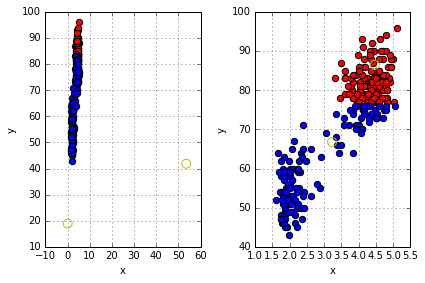

The current iteration of k-means is: 1,                the average loss is 2152.3704125727045.


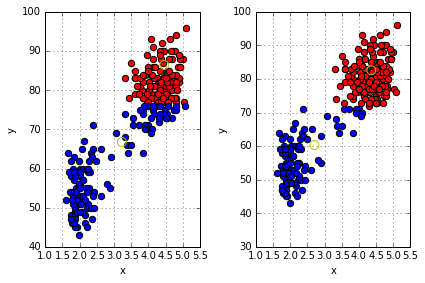

The current iteration of k-means is: 2,                the average loss is 1505.455338740357.


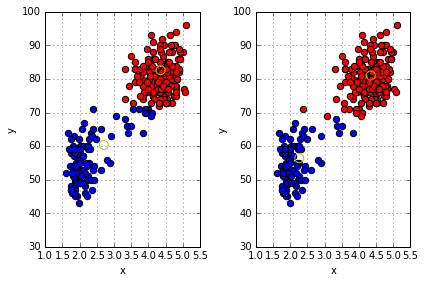

The current iteration of k-means is: 3,                the average loss is 1307.7239678117833.


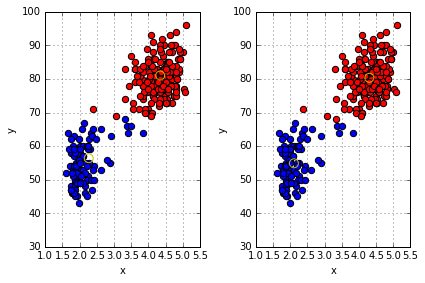

The current iteration of k-means is: 4,                the average loss is 1274.7885320247588.


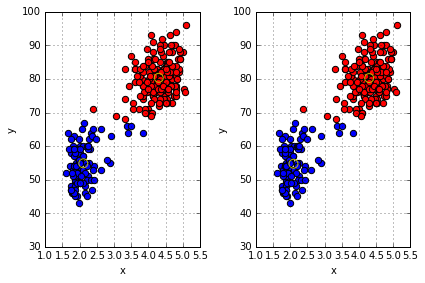

The current iteration of k-means is: 5,                the average loss is 1273.624798355842.


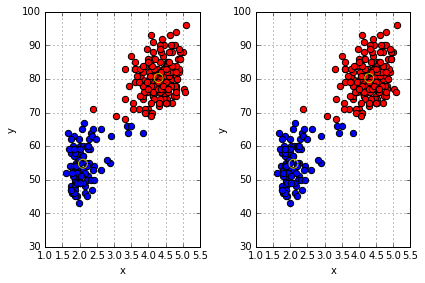

The current iteration of k-means is: 6,                the average loss is 1273.624798355842.


In [13]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [ ]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

#### preprocess image

In [ ]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: vectorize and normalize the original_image.
    # ***************************************************  
    return processed_image

processed_image = preprocess_image(original_image)

In [ ]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: use kmean to compress the image.
    # *************************************************** 
    raise NotImplementedError

    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)